In [1]:
import tensorflow as tf
from Dive_into_deep_learning.d2l import tensorflow as d2l

In [2]:
class RNN(d2l.Module):
    def __init__(self, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = tf.keras.layers.SimpleRNN(
            num_hiddens, return_sequences=True, return_state=True, time_major=True
        )

    def forward(self, inputs, H=None):
        outputs, H = self.rnn(inputs, H)
        return outputs, H

In [3]:
class RNNLM(d2l.RNNLMScratch):
    def init_params(self):
        self.linear = tf.keras.layers.Dense(self.vocab_size)
    
    def output_layer(self, hiddens):
        return tf.transpose(self.linear(hiddens), (1, 0, 2))

In [4]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)

'it haskukcswoubwxpezbwvtlz'

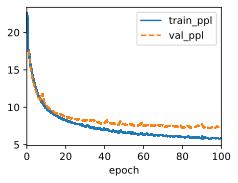

In [5]:
with d2l.try_gpu():
    trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1)
trainer.fit(model, data)

In [6]:
model.predict('it has', 20, data.vocab)

'it has of shas of shand th'